In [8]:
import mglearn
import matplotlib.pyplot as plt

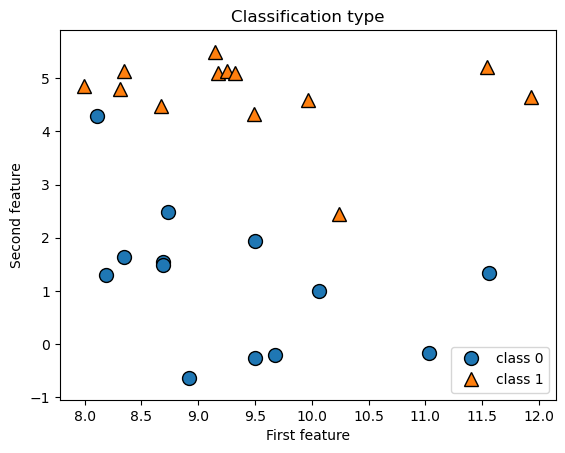

In [18]:
x,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(['class 0','class 1'],loc=4)
plt.title('Classification type')
plt.xlabel('First feature')
plt.ylabel('Second feature');

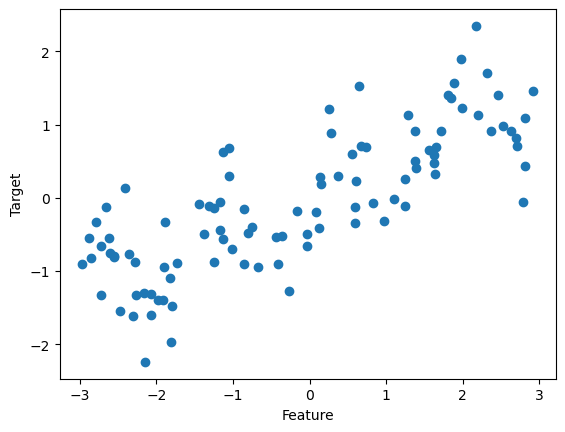

In [20]:
x,y=mglearn.datasets.make_wave(n_samples=100)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.plot(x,y,'o');

In [41]:
## Breast Cancer classification Data with 30 feature

from sklearn.datasets import load_breast_cancer
import numpy as np
cancer=load_breast_cancer()

In [42]:
print(type(cancer))
print(cancer.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [43]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [44]:
print(f'shape of cancer data:{cancer.data.shape}')

shape of cancer data:(569, 30)


In [45]:
print(cancer['target_names'])

['malignant' 'benign']


In [46]:
print('sample counts per class:\n{}'.format({n: v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

sample counts per class:
{'malignant': 212, 'benign': 357}


In [47]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [49]:
np.count_nonzero(cancer.target)

357

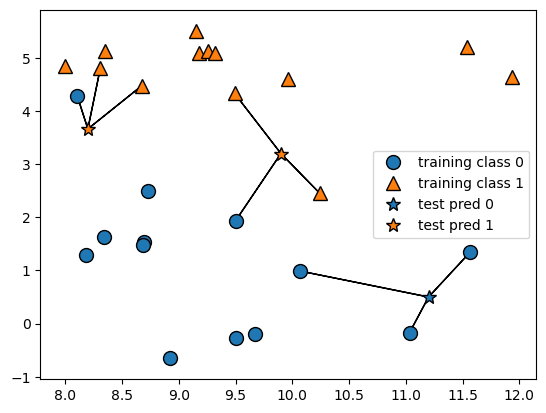

In [53]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [54]:
from sklearn.model_selection import train_test_split
x,y=mglearn.datasets.make_forge()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
print(f'Test set prediction:{clf.predict(x_test)}')
print('Actual Labels:{}'.format(y_test))
print('Test set accuracy:{:.2f}'.format(clf.score(x_test,y_test)))

Test set prediction:[1 0 1 0 1 0 0]
Actual Labels:[1 0 1 0 1 1 0]
Test set accuracy:0.86


In [59]:
## let's plot the decision bondary on the 2D plane

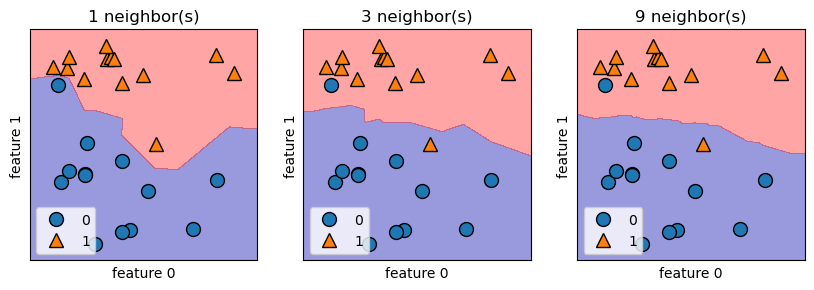

In [62]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    ax.legend(loc=3)

With only 1 neighbor the model fits very closely to training set: Overfit /complex model
with more number of neighbor the bondary is smooth corresponding to simpler model or higher generalization

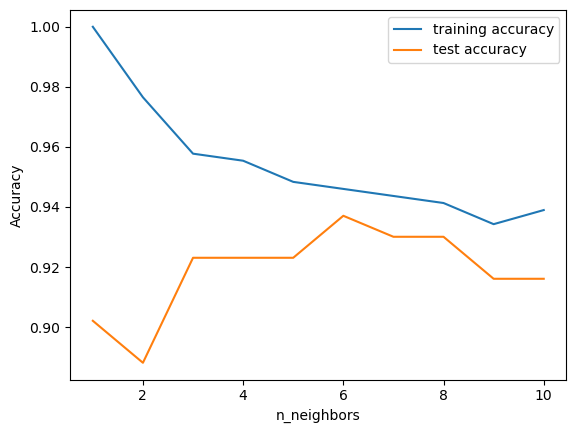

In [65]:
# breast cancer classification
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    # build model
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    # training accuracy
    training_accuracy.append(clf.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(clf.score(x_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend();

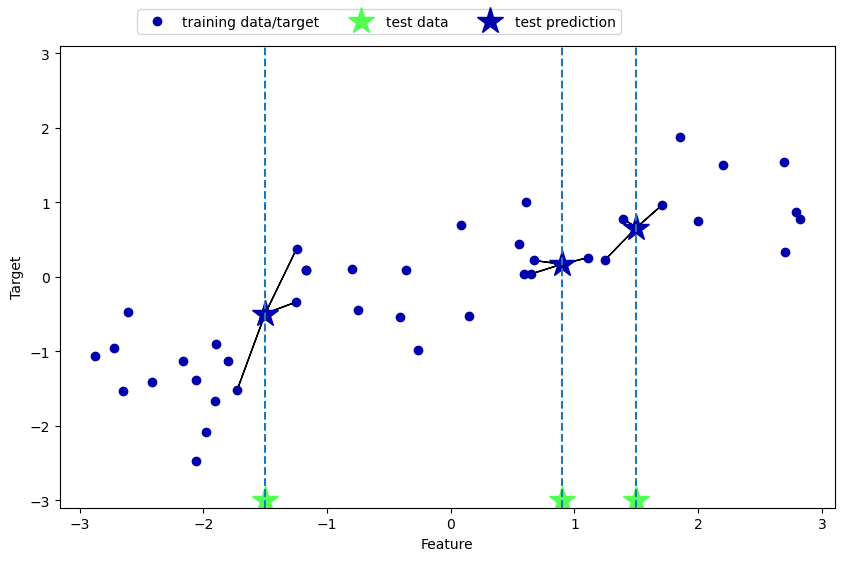

In [68]:
## KNN Regression
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
x,y = mglearn.datasets.make_wave(n_samples=40)

# training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train,y_train)

print(f'Test set prediction :\n{reg.predict(x_test)}')
print('test set  R^2: {:.2f}'.format(reg.score(x_test,y_test)))


Test set prediction :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set  R^2: 0.83


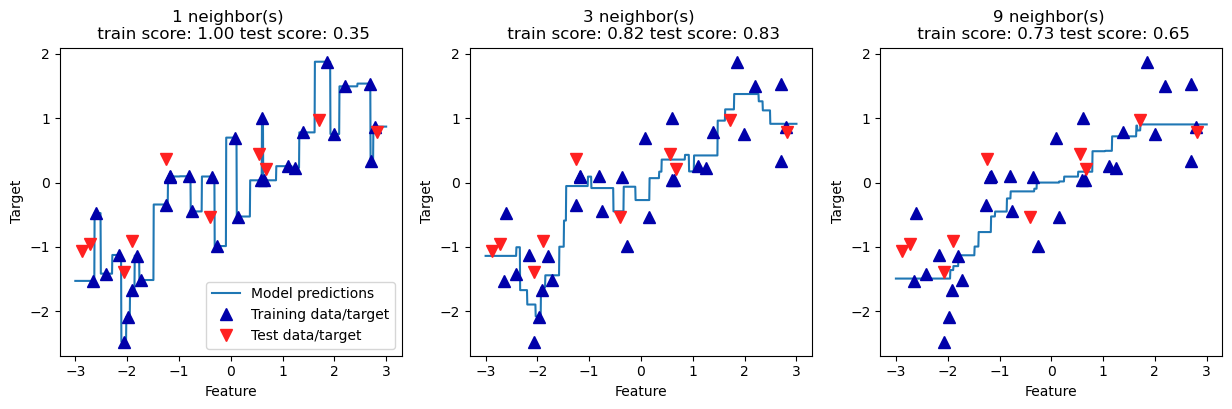

In [81]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors,ax in zip([1,3,9],axes):
    
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(x_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(x_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title('{} neighbor(s) \n train score: {:.2f} test score: {:.2f}'.format(n_neighbors,reg.score(x_train,y_train),reg.score(x_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions','Training data/target','Test data/target'],loc='best');

Linear Regression

y=w[0].x[0] + w[1].x[1]+.........+ w[p].x[p]+b

w[0]: 0.393906  b: -0.031804


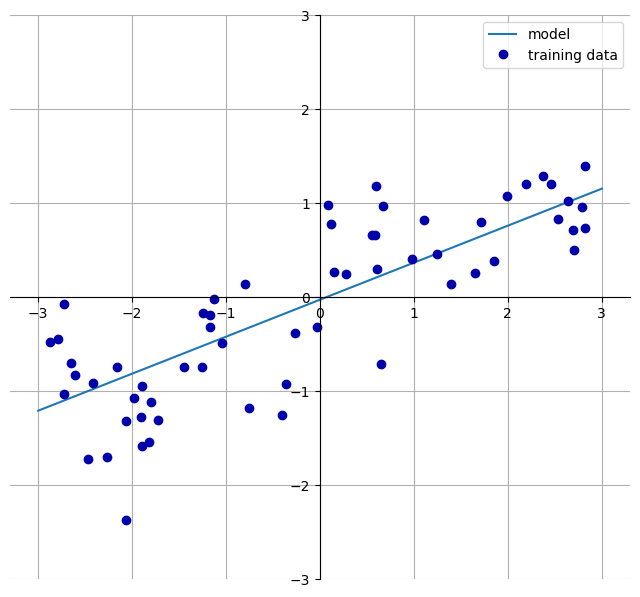

In [88]:
mglearn.plots.plot_linear_regression_wave()

In [121]:
from sklearn.linear_model import LinearRegression
x,y=mglearn.datasets.make_wave(n_samples=60)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

lr=LinearRegression().fit(x_train,y_train)
print(f'coefficient:{lr.coef_}')
print(f'intercept:{lr.intercept_}')
print('Training Score:{:.2f}'.format(lr.score(x_train,y_train)))
print('Training Score:{:.2f}'.format(lr.score(x_test,y_test)))

coefficient:[0.39390555]
intercept:-0.031804343026759746
Training Score:0.67
Training Score:0.66


In [123]:
## Boston Housing Dataset
x,y=mglearn.datasets.load_extended_boston()
print(x.shape)
print(y.shape)

(506, 104)
(506,)


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression().fit(x_train,y_train)
print('Training Score:{:.2f}'.format(lr.score(x_train,y_train)))
print('Training Score:{:.2f}'.format(lr.score(x_test,y_test)))


Training Score:0.95
Training Score:0.61


In [125]:
##Ridge Regression
from sklearn.linear_model import Ridge

ridge=Ridge().fit(x_train,y_train)
print('training score:{:.2f}'.format(ridge.score(x_train,y_train)))
print('test score:{:.2f}'.format(ridge.score(x_test,y_test)))

training score:0.89
test score:0.75


In [126]:
ridge10=Ridge(alpha=10).fit(x_train,y_train)
print('training score:{:.2f}'.format(ridge10.score(x_train,y_train)))
print('test score:{:.2f}'.format(ridge10.score(x_test,y_test)))

training score:0.79
test score:0.64


In [127]:
ridge05=Ridge(alpha=5).fit(x_train,y_train)
print('training score:{:.2f}'.format(ridge05.score(x_train,y_train)))
print('test score:{:.2f}'.format(ridge05.score(x_test,y_test)))

training score:0.82
test score:0.68


In [128]:
ridge01=Ridge(alpha=0.1).fit(x_train,y_train)
print('training score:{:.2f}'.format(ridge01.score(x_train,y_train)))
print('test score:{:.2f}'.format(ridge01.score(x_test,y_test)))

training score:0.93
test score:0.77


In [129]:
#overfitting in above cell

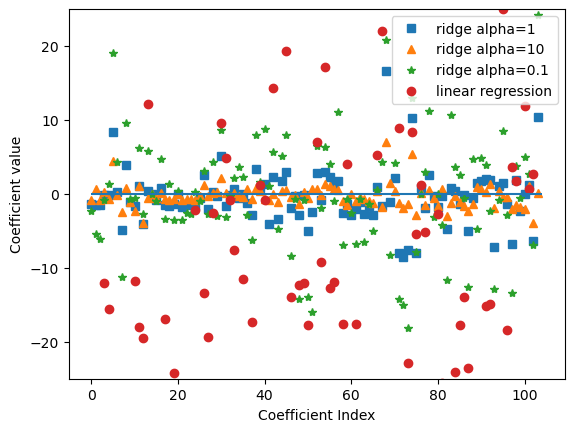

In [130]:
plt.plot(ridge.coef_,'s',label='ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='ridge alpha=10')
plt.plot(ridge01.coef_,'*',label='ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='linear regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient value')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

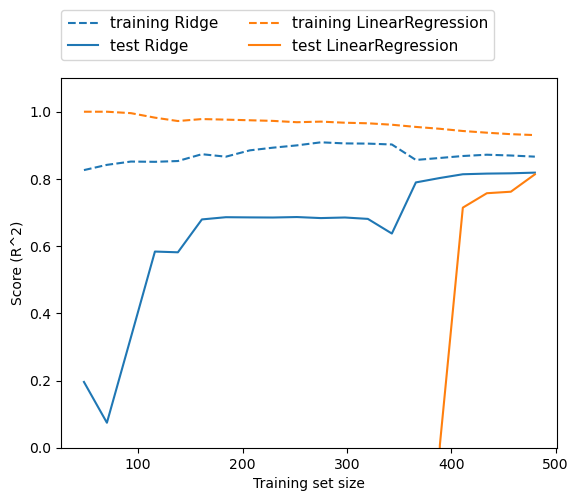

In [131]:
mglearn.plots.plot_ridge_n_samples()

learning curve for ridge and linear regression on boston housing dataset. With enough training data, regularization becomes less important.

In [132]:
print(x_train.shape,x_test.shape)

(379, 104) (127, 104)


In [136]:
## Lasso Regression
from sklearn.linear_model import Lasso

lasso=Lasso().fit(x_train,y_train)
print('Training score:{:.2f}'.format(lasso.score(x_train,y_train)))
print('Test score:{:.2f}'.format(lasso.score(x_test,y_test)))
print('number of features used:{}'.format(np.sum(lasso.coef_!=0)))

Training score:0.29
Test score:0.21
number of features used:4


*Using Linear models for classification:*

How well a particular combination of coefficient and intercept fits the trainig data \ Loss function

What is the regularization used

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


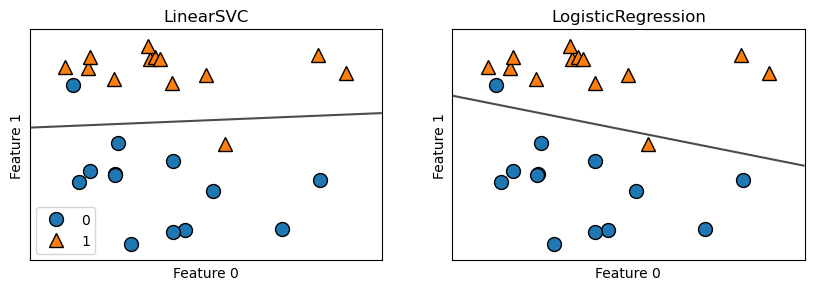

In [142]:
## Logistic regression
## linear support vector machine

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x,y =mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(x,y)
    
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend();


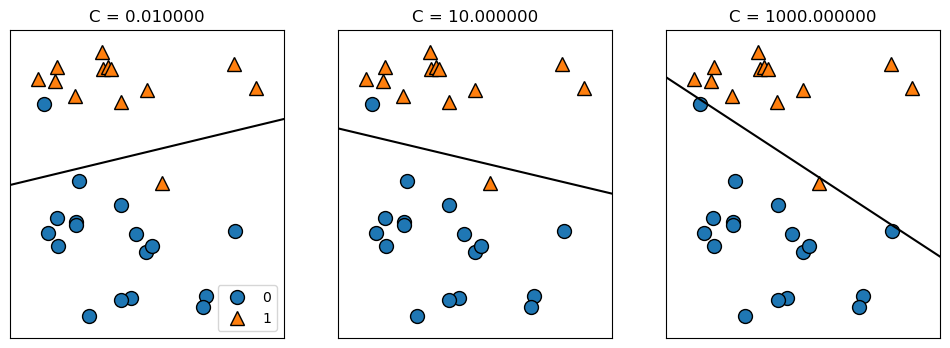

In [144]:
mglearn.plots.plot_linear_svc_regularization()

In [158]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression(C=100))
pipe.fit(x_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

# logreg=LogisticRegression().fit(x_train,y_train)

print('Training score:{:.3f}'.format(pipe.score(x_train, y_train)))
print('Test score:{:.3f}'.format(pipe.score(x_test,y_test)))

Training score:0.995
Test score:0.951


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
logreg100=LogisticRegression(C=100).fit(x_train,y_train)

print('Training score:{:.3f}'.format(logreg100.score(x_train,y_train)))
print('Test score:{:.3f}'.format(logreg100.score(x_test,y_test)))

Training score:0.944
Test score:0.965


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


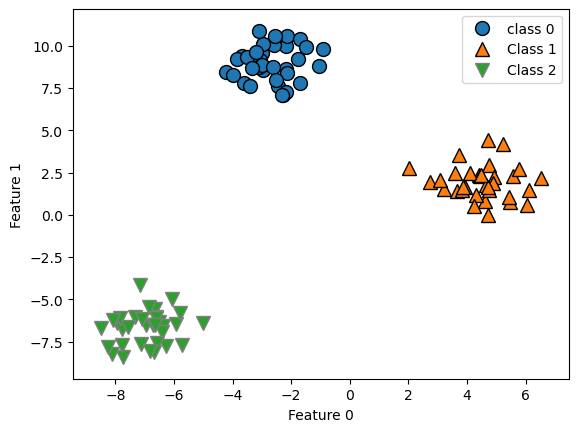

In [161]:
from sklearn.datasets import make_blobs
x,y=make_blobs(random_state=42)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0','Class 1','Class 2']);

In [162]:
linear_svm=LinearSVC().fit(x,y)

print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


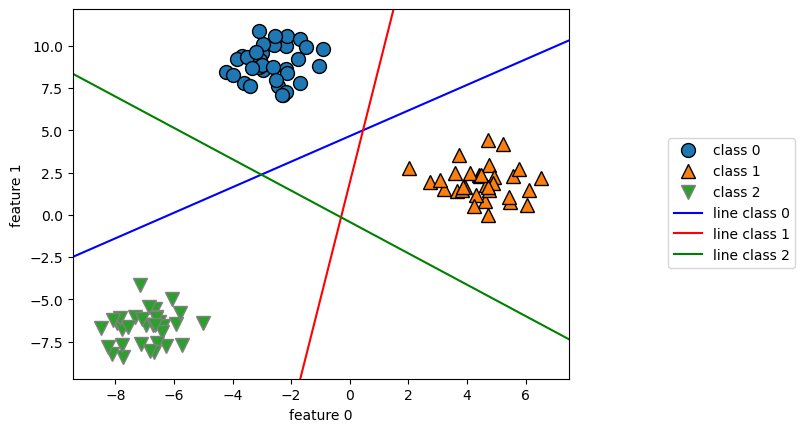

In [171]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.legend(['class 0','class 1','class 2','line class 0','line class 1','line class 2'],loc=(1.2,0.3))

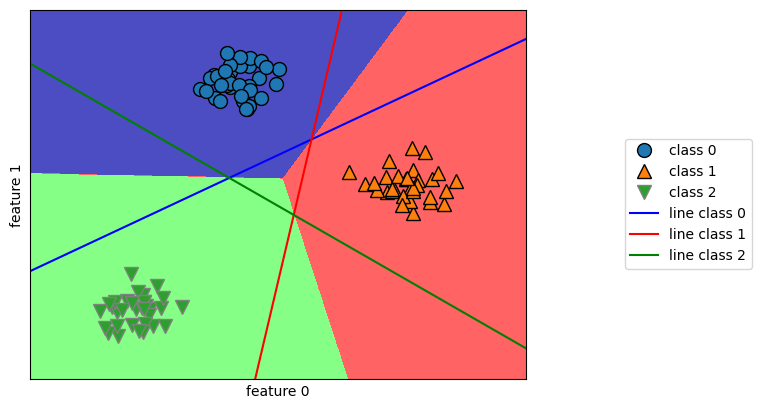

In [172]:
mglearn.plots.plot_2d_classification(linear_svm,x,fill=True,alpha=0.7)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.legend(['class 0','class 1','class 2','line class 0','line class 1','line class 2'],loc=(1.2,0.3))

In [180]:
from sklearn.tree import DecisionTreeClassifier
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

print('Training score:{:.3f}'.format(tree.score(x_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))


Training score:1.000
Test score:0.937


In [182]:
## limiting depth of tree to controll overfit

tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print('Training score:{:.3f}'.format(tree.score(x_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))


Training score:0.988
Test score:0.951


In [183]:
import graphviz

In [185]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],
                feature_names=cancer.feature_names,impurity=False,filled=True)

In [192]:
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [193]:
print('Feature importance :\n{}'.format(tree.feature_importances_))

Feature importance :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


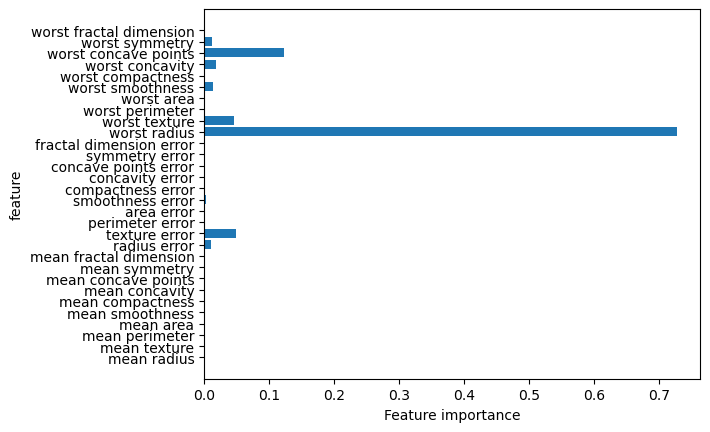

In [197]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


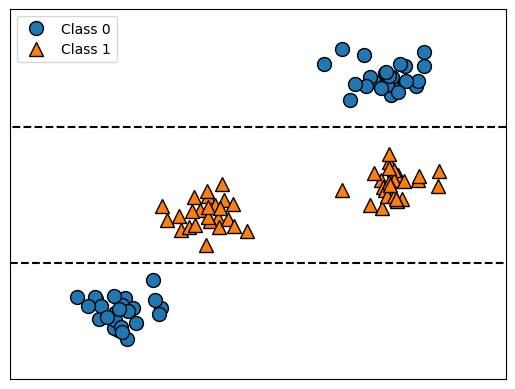

In [200]:
treee=mglearn.plots.plot_tree_not_monotone()

In [202]:
3+3*2

9

In [203]:
(3+3)*2

12

In [204]:
type('3.2')

str

In [205]:
int(True)

1

In [207]:
True+True

2

In [208]:
True+False

1

In [209]:
'1'+'2'

'12'

In [210]:
'hello'.upper()

'HELLO'

In [211]:
str(1+1)

'2'

In [212]:
"ABC".replace("AB", "ab")

'abC'

In [214]:
x=2/2

In [215]:
x


1.0

In [216]:
type(x)

float

In [217]:
x=10/5

In [218]:
type(x)

float

In [219]:
34/2

17.0